In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [60]:
data = pd.read_csv(r'C:\Users\user\Desktop\assignment3\spending_patterns_detailed.csv')

In [64]:
print(data.head())  # Check first 5 rows
print(data.columns)  # Check column names
print(data.info())  # Check dataset structure

  Customer ID               Category                 Item  Quantity  \
0   CUST_0159              Groceries                 Milk         1   
1   CUST_0017      Friend Activities  Dinner with Friends         2   
2   CUST_0094  Housing and Utilities           Water Bill         1   
3   CUST_0162                Fitness           Yoga Class         5   
4   CUST_0129                  Gifts              Flowers         3   

   Price Per Unit  Total Spent  Payment Method    Location Transaction Date  
0            1.28         1.28      Debit Card  Mobile App       2024-11-13  
1           74.69       149.39      Debit Card    In-store       2023-05-04  
2           76.06        76.06  Digital Wallet  Mobile App       2023-12-16  
3           11.24        56.18            Cash    In-store       2024-01-28  
4           43.71       131.12      Debit Card    In-store       2023-07-28  
Index(['Customer ID', 'Category', 'Item', 'Quantity', 'Price Per Unit',
       'Total Spent', 'Payment Me

In [15]:
data.columns = data.columns.str.strip()
print(data.columns)  # Confirm column names are fixed

Index(['Customer ID', 'Category', 'Item', 'Quantity', 'Price Per Unit',
       'Total Spent', 'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')


In [66]:
print(data.isnull().sum())  # Count missing values per column

Customer ID         0
Category            0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [52]:
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])  # Convert to datetime
data['Quantity'] = pd.to_numeric(data['Quantity'])
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'])
data['Total Spent'] = pd.to_numeric(data['Total Spent'])

In [80]:
print(data['Total Spent'].describe())  # Shows min, max, mean, etc.

count     10000.000000
mean       2534.750890
std       19676.741772
min           1.110000
25%          25.957500
50%          88.115000
75%         336.375000
max      352230.760000
Name: Total Spent, dtype: float64


In [72]:
# Correct way to remove dollar signs and commas
data['Total Spent'] = data['Total Spent'].replace(r'[\$,]', '', regex=True).astype(float)

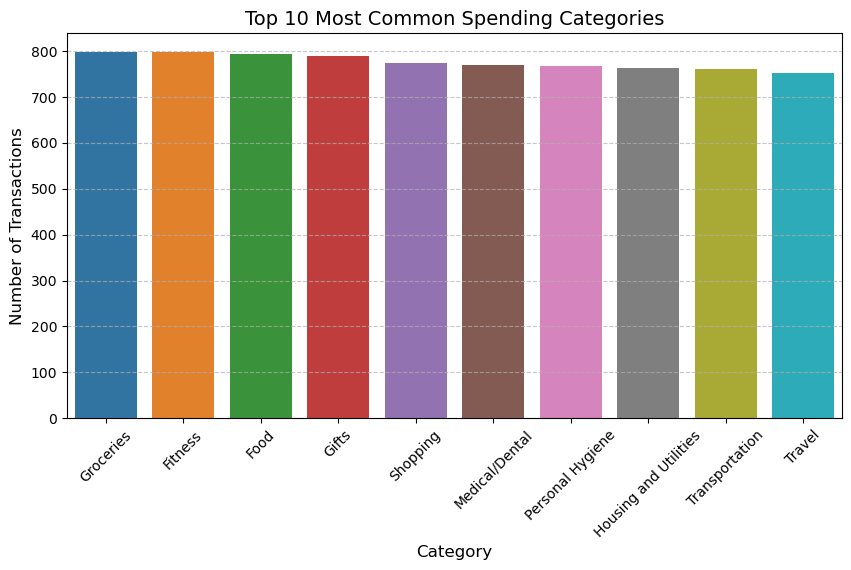

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of transactions per category
category_counts = data['Category'].value_counts().head(10)  # Top 10 categories

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, legend=False)

# Labels and title
plt.title('Top 10 Most Common Spending Categories', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [1]:
#The first graph, a bar chart, illustrates the top 10 most common spending categories based on the number of transactions. Categories like Groceries, Fitness, Food, and Gifts have the highest transaction counts, indicating that these are the most frequently purchased items or services. Other categories, such as Transportation and Travel, also appear in the top 10 but with slightly lower transaction volumes. 

In [103]:
# Ensure 'Transaction Date' is in datetime format
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

In [107]:
# Group by month-end and sum 'Total Spent'
monthly_spending = data.resample('ME', on='Transaction Date')['Total Spent'].sum()

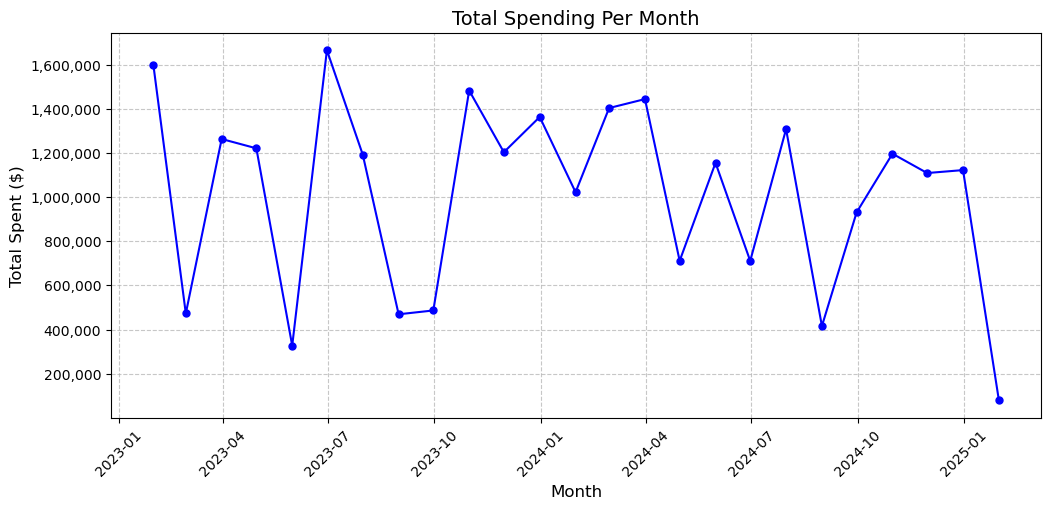

In [111]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group by month-end and sum 'Total Spent'
monthly_spending = data.resample('ME', on='Transaction Date')['Total Spent'].sum()

# Create line chart for total spending per month
plt.figure(figsize=(12, 5))
plt.plot(monthly_spending.index, monthly_spending.values, marker='o', linestyle='-', color='b', markersize=5)

# Labels and title
plt.title('Total Spending Per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spent ($)', fontsize=12)

# Format Y-Axis to show normal numbers (remove scientific notation)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Improve readability
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the line chart
plt.show()


In [ ]:
#The second graph, a line chart, represents total spending per month from 2023 to early 2025. The chart highlights significant fluctuations, with noticeable spending peaks in mid-2023. The general pattern indicates varying monthly expenses, which could be influenced by external factors such as holidays, sales events, or economic conditions.